<b>Session 4 Assignemnt Linear Regression - MMAI 863 
Fall 2023 John Kim 23MVD1</b>

### 1. Looking at the classical OLS model output, is it a valid model?
The adjusted R-squared is 0.882, which is close to the R-squared value of 0.885. F-statstics is almost 350 which is much higher than 1. The model is valid.

### 2. How much of the total variance of the dependent variable can be explained by the model?
OLS model outputs shows that 88.5% of the variance in sales can be explained by the predictors (TV, Radio, Newspaper) in the moddel.

### 3. What are the statistical significant coefficients of the model?
The statistically significant coefficients of the model are TV and Radio.

From the provided OLS Regression Results:
1. Intercept: p-value = 0.000 < 0.05, so it IS statistically significant.
2. TV: p-value = 0.000 < 0.05, so it IS statistically significant.
3. Radio: p-value = 0.000 < 0.05, so IS is statistically significant.
4. Newspaper: p-value = 0.813 > 0.05, so it is NOT statistically significant.

### 4. Compare the OLS result with Ridge and Lasso. Do you see a simplification of the model while maintaining the error in check? (You may need to choose an alpha and calculate the MSE)

1. For Ridge and Lasso regularization techniques, the lowest MSEs for smaller alpha values are almost identical to the OLS MSE, being 1.928925 for both when alpha is 0.000001.
2. As we increase the value of alpha, the MSE for Ridge and Lasso starts to diverge from the OLS MSE. For Ridge, the divergence is moderate, with an MSE of 1.929021 at alpha = 1. For Lasso, the divergence becomes more pronounced, with an MSE of 1.981223 at alpha = 1.
3. This indicates that, without regularization (or minimal regularization), the models perform similarly in terms of error. However, as we increase the regularization, the Lasso model starts to perform worse than the Ridge model. This is particularly noticeable at higher alpha values. Ridge, on the other hand, tends to shrink coefficients but does not set them to zero.
4. If we're looking to simplify our model while maintaining error in check, we might lean towards Lasso with a slightly higher alpha value than the smallest ones.
5. For instance, choosing an alpha like 0.01 for Lasso results in an MSE of 1.929387, which is only marginally higher than the OLS MSE.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy as sp

import statsmodels.api as sm

In [ ]:
df = pd.read_csv("Advertising.csv", index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
X = df.drop('sales', axis=1)
y = df['sales']

In [ ]:
X.to_numpy()

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

## Classical approach

In [ ]:
X = sm.add_constant(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=None, random_state=1, shuffle=True, stratify=None)

In [ ]:
ols_m = sm.OLS(y_train,X_train).fit()
print(ols_m.summary())

y_pred = ols_m.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
y_avg = y.mean()
print("y average:", y_avg)
print("MSE:",mse)
print("SQRT MSE:", np.sqrt(mse))
print("MAE:",mae)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     348.9
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.18e-63
Time:                        12:10:42   Log-Likelihood:                -280.14
No. Observations:                 140   AIC:                             568.3
Df Residuals:                     136   BIC:                             580.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9372      0.390      7.540      0.0

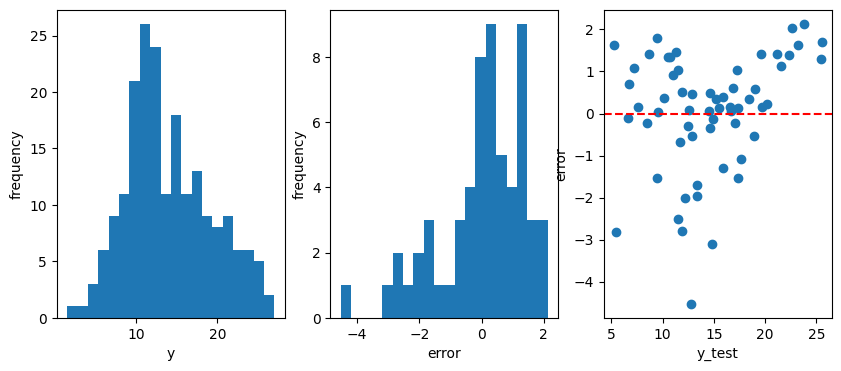

In [ ]:
error = y_test-y_pred
fig, axes = plt.subplots(1, 3,figsize=(10,4))

plt.subplot(1,3,1)
plt.hist(y,bins=20)
plt.xlabel("y")
plt.ylabel("frequency")

plt.subplot(1,3,2)
plt.hist(error,bins=20)
plt.xlabel("error")
plt.ylabel("frequency")

plt.subplot(1,3,3)
plt.scatter(y_test,error)
plt.xlabel("y_test")
plt.ylabel("error")
plt.axhline(y = 0.0, color = 'r', linestyle = 'dashed') 

plt.show()


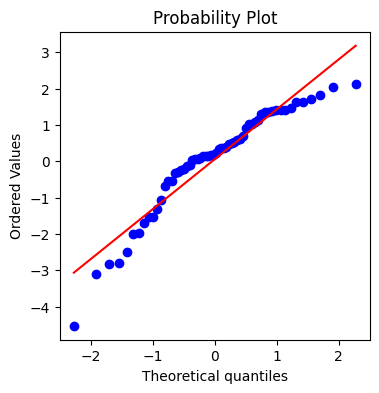

In [ ]:
fig, ax = plt.subplots(figsize=(4,4),dpi=100)
_=sp.stats.probplot(error,plot=ax)

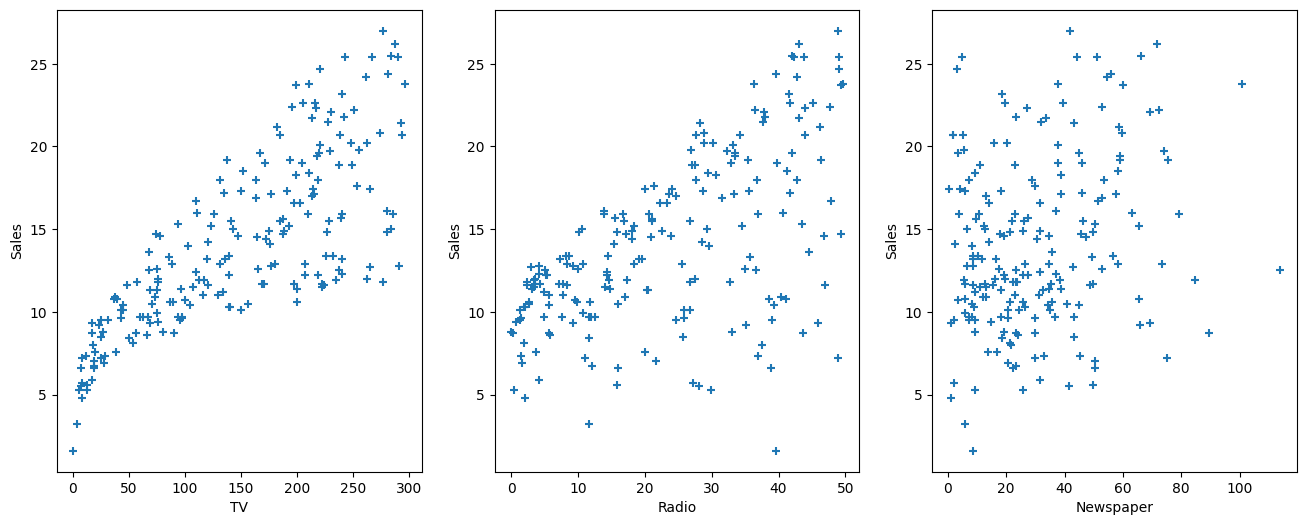

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(16,6))

plt.subplot(1,3,1)
plt.scatter(df['TV'],y,marker= '+')
plt.xlabel("TV")
plt.ylabel("Sales")

plt.subplot(1,3,2)
plt.scatter(df['radio'],y,marker= '+')
plt.xlabel("Radio")
plt.ylabel("Sales")

plt.subplot(1,3,3)
plt.scatter(df['newspaper'],y,marker= '+')
plt.xlabel("Newspaper")
plt.ylabel("Sales")

plt.show()

## Ridge L2 Regularization

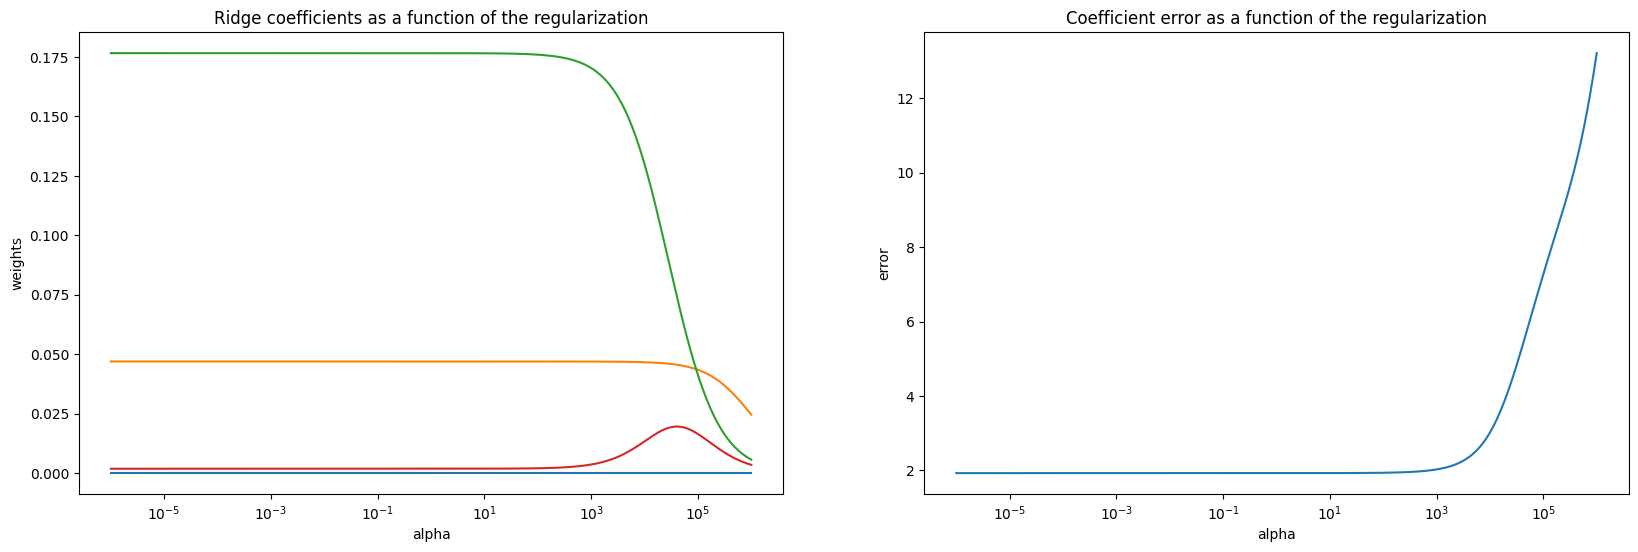

In [ ]:
clf = Ridge()

coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)
    y_pred = clf.predict(X_test)
    errors.append(mean_squared_error(y_pred, y_test))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

To see how the coefficients are impacted by the regularization, we will generate less points.

In [ ]:
coefs = []
errors = []
## repeat with 7 points of alphas
alphas = np.logspace(-6, 6, 7)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a).fit(X_train, y_train)
    coefs.append(clf.coef_)
    y_pred = clf.predict(X_test)
    errors.append(mean_squared_error(y_test,y_pred))

In [ ]:
print("Ridge alphas:")
print(alphas)
print("Ridge Coefficients:")
print(coefs)
print("Ridge Errors")
print(errors)
##printing table for readability
print((pd.DataFrame({'Ridge Alpha': alphas, 'Ridge MSE': errors})).to_string(index=False))

Ridge alphas:
[1.e-06 1.e-04 1.e-02 1.e+00 1.e+02 1.e+04 1.e+06]
Ridge Coefficients:
[array([0.        , 0.04695205, 0.17658644, 0.00185115]), array([0.        , 0.04695205, 0.17658643, 0.00185115]), array([0.        , 0.04695205, 0.17658637, 0.00185117]), array([0.        , 0.04695201, 0.17657991, 0.00185302]), array([0.        , 0.04694873, 0.17593661, 0.00203651]), array([0.        , 0.04662053, 0.12988685, 0.01335896]), array([0.        , 0.02459622, 0.00565442, 0.00347497])]
Ridge Errors
[1.9289249075623345, 1.9289249170427452, 1.92892586508423, 1.9290206735169109, 1.9385438398343444, 3.021676980400545, 13.214390857811768]
   Ridge Alpha                                                       Ridge Coefficients  Ridge MSE
      0.000001   [0.0, 0.04695204776845141, 0.17658643526164924, 0.0018511533207561626]   1.928925
      0.000100  [0.0, 0.046952047765164914, 0.17658643461573637, 0.0018511535052860568]   1.928925
      0.010000   [0.0, 0.04695204743651469, 0.17658637002447342, 0.

## Lasso L1 Regularization

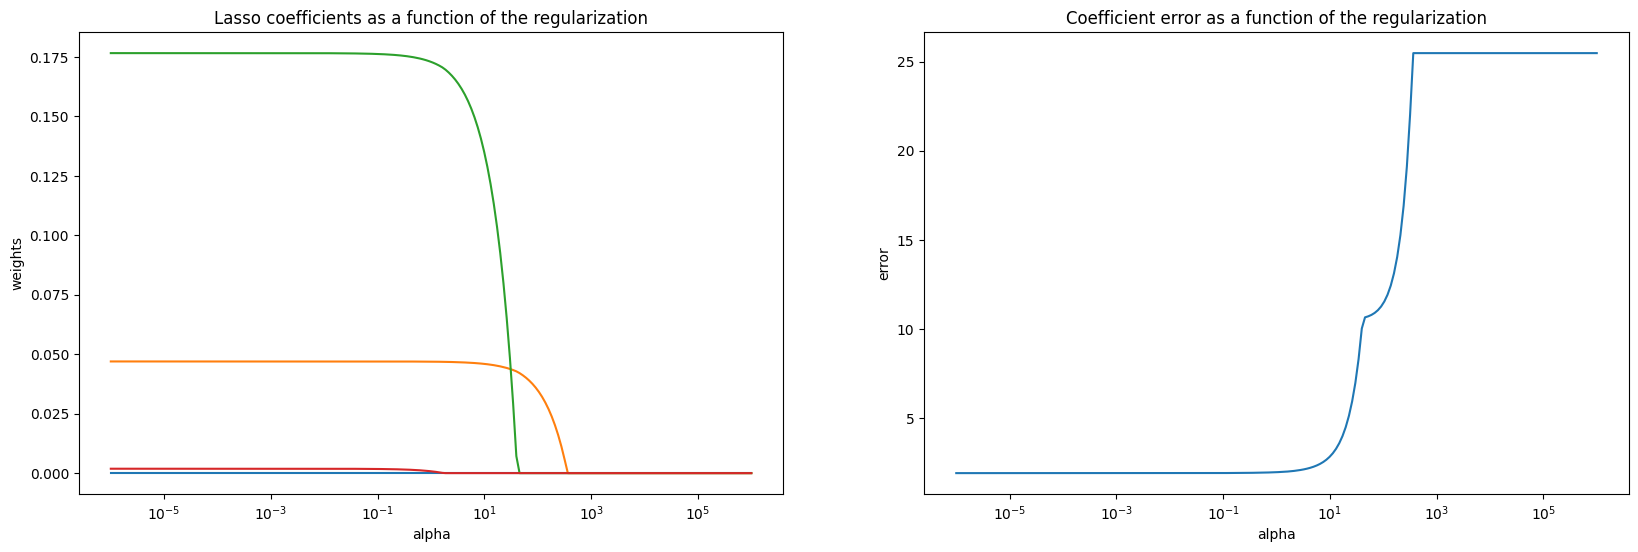

In [ ]:
clf = Lasso()

coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)
    y_pred = clf.predict(X_test)
    errors.append(mean_squared_error(y_test,y_pred))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

To see how the coefficients are impacted by the regularization, we will generate less points.

In [ ]:
coefs = []
errors = []

alphas = np.logspace(-6, 6, 7)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)
    y_pred = clf.predict(X_test)
    errors.append(mean_squared_error(y_test,y_pred))

In [ ]:
print("Lasso alphas:")
print(alphas)
print("Lasso Coefficients:")
print(coefs)
print("Lasso Errors")
print(errors)
##printing table for readability
print((pd.DataFrame({'Lasso Alpha': alphas, 'Lasso MSE': errors})).to_string(index=False))

Lasso alphas:
[1.e-06 1.e-04 1.e-02 1.e+00 1.e+02 1.e+04 1.e+06]
Lasso Coefficients:
[array([0.        , 0.04695205, 0.17658643, 0.00185115]), array([0.        , 0.04695204, 0.17658611, 0.00185103]), array([0.        , 0.04695111, 0.17655104, 0.00184   ]), array([0.        , 0.04686006, 0.17290195, 0.00077704]), array([0.        , 0.03478452, 0.        , 0.        ]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.])]
Lasso Errors
[1.928924953096052, 1.92892913020265, 1.9293870975427057, 1.9812231518706367, 11.446002648052133, 25.469963945578236, 25.469963945578236]
   Lasso Alpha  Lasso MSE
      0.000001   1.928925
      0.000100   1.928929
      0.010000   1.929387
      1.000000   1.981223
    100.000000  11.446003
  10000.000000  25.469964
1000000.000000  25.469964
